Import Libraries:

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
from scipy.ndimage import gaussian_filter1d

sns.set_theme()

Upload cleaned dataset:

In [32]:
cleaned = pd.read_csv('C:/Users/blue3/OneDrive/Desktop/INST414/cleaned_global_health_data.csv')

cleaned.head()

,Country,Year,Disease Name,Prevalence Rate (%),Incidence Rate (%),Mortality Rate (%),Age Group,Gender,Population Affected,Healthcare Access (%),...,Hospital Beds per 1000,Treatment Type,Average Treatment Cost (USD),Availability of Vaccines/Treatment,Recovery Rate (%),DALYs,Improvement in 5 Years (%),Per Capita Income (USD),Education Index,Urbanization Rate (%)
0,Turkey,2015,COVID-19,0.91,2.35,6.22,36-60,Male,154878,56.41,...,3.49,Vaccination,27834,Yes,98.55,41,5.81,12245,0.41,40.20
1,Italy,2013,Tuberculosis,0.83,13.59,7.01,61+,Male,472908,67.00,...,5.90,Medication,8908,Yes,50.06,2832,6.93,47701,0.50,48.14
2,Nigeria,2007,Tuberculosis,3.48,5.71,1.21,0-18,Female,393296,75.60,...,3.54,Medication,15744,Yes,65.45,4584,9.81,23222,0.46,66.49
3,Mexico,2009,Cancer,3.88,10.85,1.85,0-18,Male,462950,71.06,...,6.22,Vaccination,36202,Yes,63.54,2797,3.16,30015,0.61,29.05
4,Nigeria,2007,Diabetes,8.92,13.19,5.52,36-60,Female,227849,84.41,...,9.57,Therapy,45685,No,68.02,423,3.98,60608,0.61,68.17


In [3]:
cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250394 entries, 0 to 250393
Data columns (total 21 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Country                             250394 non-null  object 
 1   Year                                250394 non-null  int64  
 2   Disease Name                        250394 non-null  object 
 3   Prevalence Rate (%)                 250394 non-null  float64
 4   Incidence Rate (%)                  250394 non-null  float64
 5   Mortality Rate (%)                  250394 non-null  float64
 6   Age Group                           250394 non-null  object 
 7   Gender                              250394 non-null  object 
 8   Population Affected                 250394 non-null  int64  
 9   Healthcare Access (%)               250394 non-null  float64
 10  Doctors per 1000                    250394 non-null  float64
 11  Hospital Beds per 1000    

Univariate Visualizations:

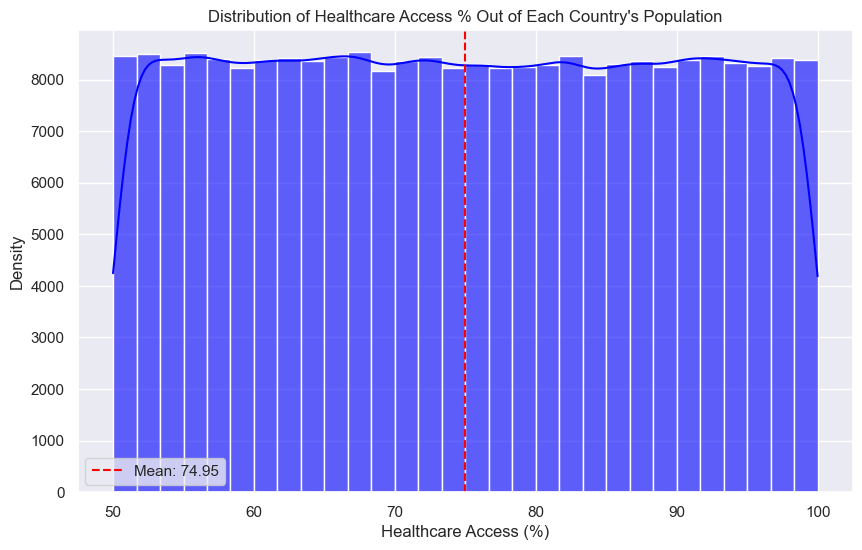

In [4]:
#Histogram measuring the distribution of Healthcare Access Percentages
fig_hist, fig_hist_ax = plt.subplots(figsize=(10, 6))


sns.histplot(
    cleaned['Healthcare Access (%)'],
    bins=30,
    kde=True,
    color='blue',
    alpha=0.6,
    ax=fig_hist_ax
)

# Calculate mean (average) of healthcare access rates
mean_value = cleaned['Healthcare Access (%)'].mean()

fig_hist_ax.axvline(mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')

fig_hist_ax.set_xlabel('Healthcare Access (%)')

fig_hist_ax.set_ylabel('Density')

fig_hist_ax.set_title("Distribution of Healthcare Access % Out of Each Country's Population")

fig_hist_ax.legend()


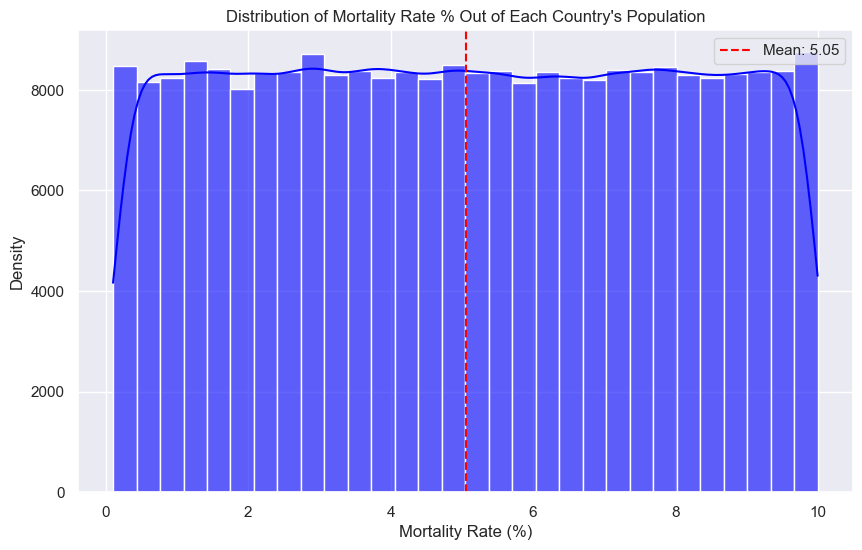

In [5]:
#Histogram measuring the distribution of Recovery Rate
fig_hist, fig_hist_ax = plt.subplots(figsize=(10, 6))


sns.histplot(
    cleaned['Mortality Rate (%)'],
    bins=30,
    kde=True,
    color='blue',
    alpha=0.6,
    ax=fig_hist_ax
)

# Calculate mean (average) of healthcare access rates
mean_value = cleaned['Mortality Rate (%)'].mean()

fig_hist_ax.axvline(mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')

fig_hist_ax.set_xlabel('Mortality Rate (%)')

fig_hist_ax.set_ylabel('Density')

fig_hist_ax.set_title("Distribution of Mortality Rate % Out of Each Country's Population")

fig_hist_ax.legend()


Summary Statistics

In [6]:
cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,250394.0,2012.006965,7.207632,2000.0,2006.00,2012.00,2018.00,2024.0
Prevalence Rate (%),250394.0,10.037351,5.742777,0.1,5.06,10.02,15.01,20.0
Incidence Rate (%),250394.0,7.555310,4.305946,0.1,3.82,7.55,11.29,15.0
Mortality Rate (%),250394.0,5.053578,2.861299,0.1,2.58,5.04,7.54,10.0
Population Affected,250394.0,500657.274503,288586.723008,1000.0,250516.00,500614.00,750655.00,999998.0
Healthcare Access (%),250394.0,74.950516,14.461704,50.0,62.41,74.89,87.51,100.0
Doctors per 1000,250394.0,2.746749,1.299929,0.5,1.62,2.74,3.87,5.0
Hospital Beds per 1000,250394.0,5.232485,2.741717,0.5,2.86,5.21,7.61,10.0
Average Treatment Cost (USD),250394.0,25023.447479,14399.281285,100.0,12558.25,24972.00,37485.00,50000.0
Recovery Rate (%),250394.0,74.495296,14.158643,50.0,62.22,74.46,86.81,99.0


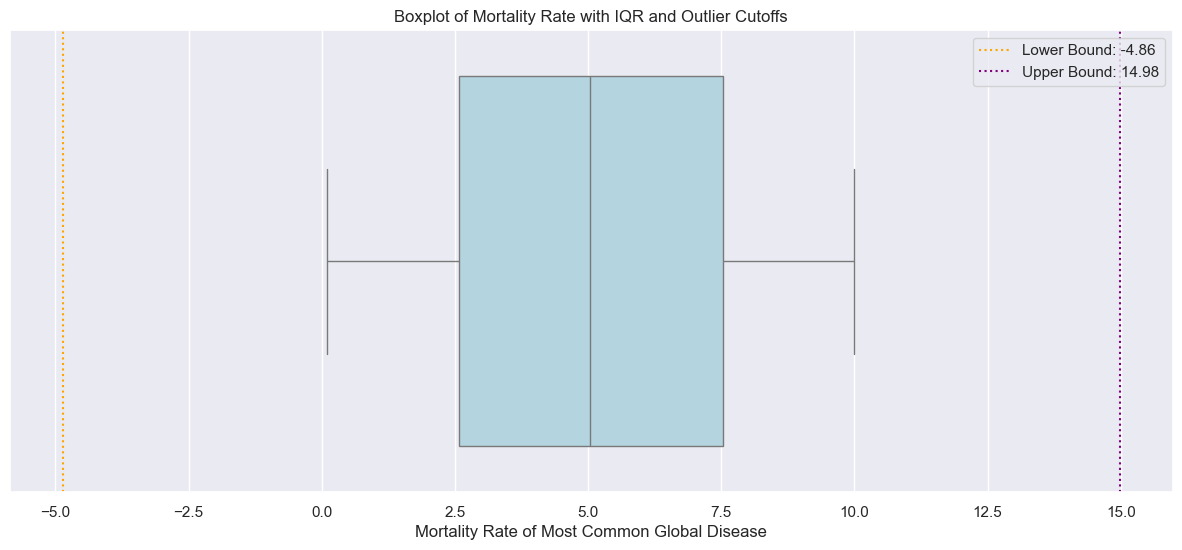

In [45]:
# Create boxplot - Mortality Rate
fig_box, fig_box_ax = plt.subplots(figsize=(15, 6))

# Plot boxplot
sns.boxplot(x=cleaned['Mortality Rate (%)'], color="lightblue", ax=fig_box_ax)

# Compute quartiles and IQR
Q1 = cleaned['Mortality Rate (%)'].quantile(0.25)
Q3 = cleaned['Mortality Rate (%)'].quantile(0.75)
IQR = Q3 - Q1

# Outlier cutoffs
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Add vertical lines for outlier cutoffs
fig_box_ax.axvline(lower_bound, color="orange", linestyle=":", label=f"Lower Bound: {lower_bound:.2f}")
fig_box_ax.axvline(upper_bound, color="purple", linestyle=":", label=f"Upper Bound: {upper_bound:.2f}")

# Add labels and title
fig_box_ax.set_title("Boxplot of Mortality Rate with IQR and Outlier Cutoffs")
fig_box_ax.set_xlabel("Mortality Rate of Most Common Global Disease")
fig_box_ax.legend()

plt.show()

Bivariate/Multivariate Analysis:

C:\Users\blue3\AppData\Local\Temp\ipykernel_9912\669370350.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Disease Name", y="Mortality Rate (%)", data=cleaned, palette="viridis", ax=fig_bar_ax)


Text(0, 0.5, 'Mortality Rate (%)')

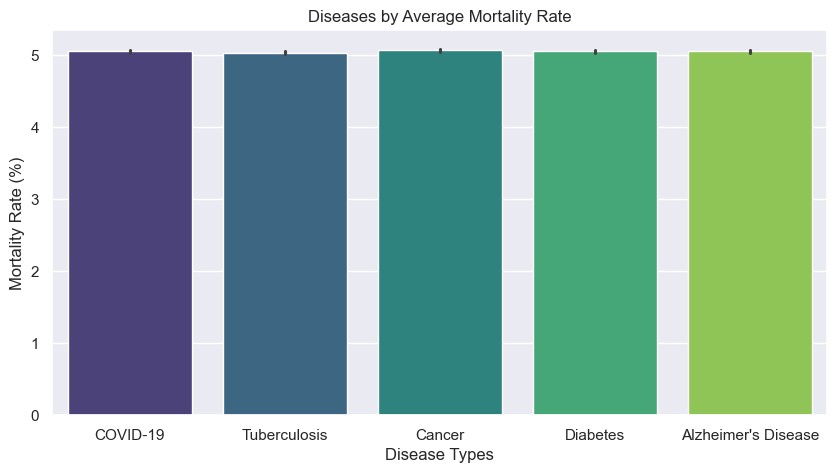

In [9]:
#Mortality Rate by Disease
fig_bar, fig_bar_ax = plt.subplots(figsize=(10, 5))

sns.barplot(x="Disease Name", y="Mortality Rate (%)", data=cleaned, palette="viridis", ax=fig_bar_ax)

fig_bar_ax.set_title("Diseases by Average Mortality Rate")

fig_bar_ax.set_xlabel("Disease Types")

fig_bar_ax.set_ylabel("Mortality Rate (%)")

In [36]:
#Just one disease - Tuberculosis
tub_filtered = cleaned[(cleaned['Disease Name']=="Tuberculosis")].copy()

In [22]:
# Calculate the global average mortality rate for each year
tub_filtered = tub_filtered.groupby("Year")["Mortality Rate (%)"].mean().reset_index()

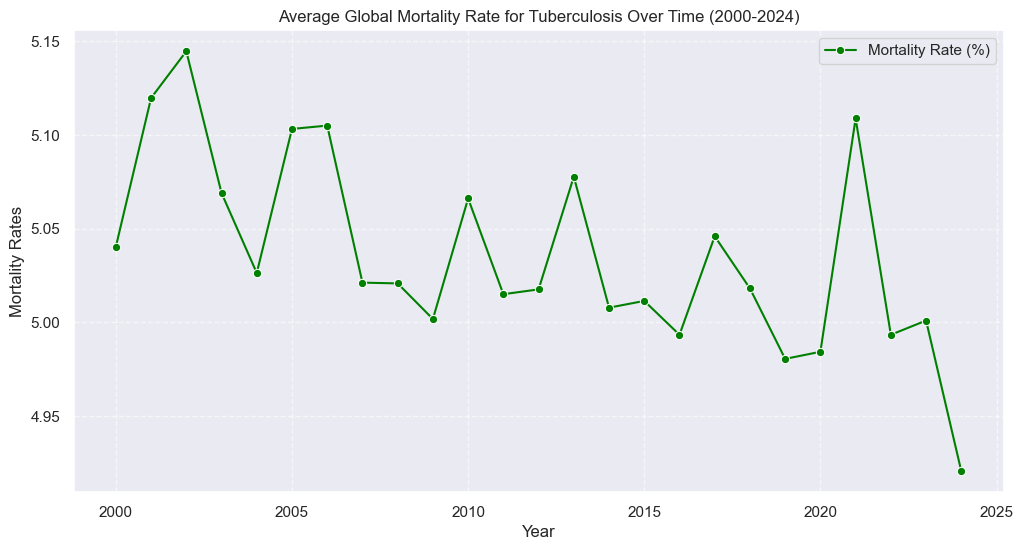

In [24]:
#Create Line chart over time
fig_line, fig_line_ax = plt.subplots(figsize=(12, 6))

sns.lineplot(
    x="Year",
    y="Mortality Rate (%)",
    data=tub_filtered,
    marker="o",
    color="green",
    ax=fig_line_ax,
    label="Mortality Rate (%)"
)

fig_line_ax.set_title("Average Global Mortality Rate for Tuberculosis Over Time (2000-2024)")

fig_line_ax.set_xlabel("Year")

fig_line_ax.set_ylabel("Mortality Rates")

fig_line_ax.grid(True, linestyle="--", alpha=0.6)


In [30]:
# Calculate the global average mortality rate for each year
cleaned_mean = cleaned.groupby("Year")["Mortality Rate (%)"].mean().reset_index()

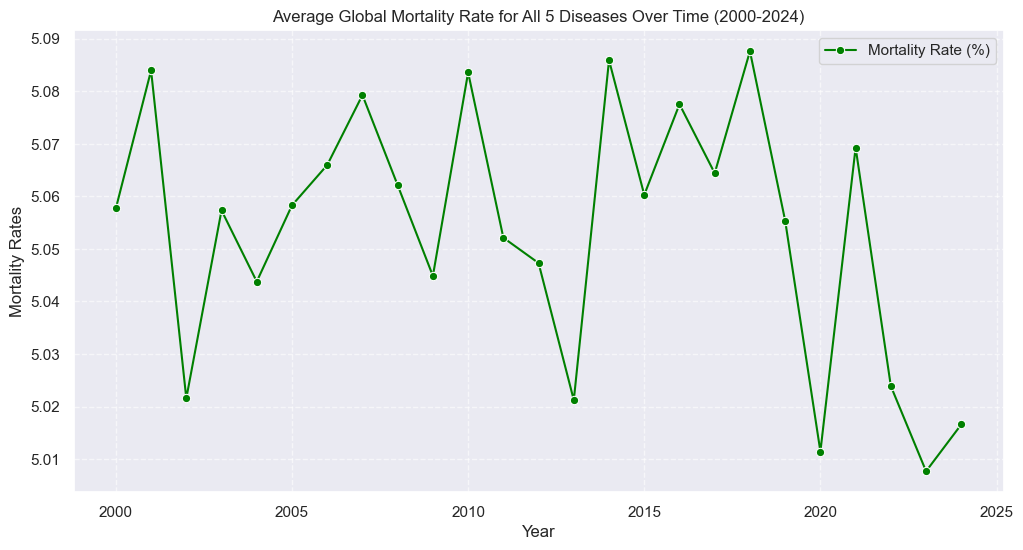

In [31]:
#Create line chart over time for all disease
fig_line, fig_line_ax = plt.subplots(figsize=(12, 6))

sns.lineplot(
    x="Year",
    y="Mortality Rate (%)",
    data=cleaned_mean,
    marker="o",
    color="green",
    ax=fig_line_ax,
    label="Mortality Rate (%)"
)

fig_line_ax.set_title("Average Global Mortality Rate for All 5 Diseases Over Time (2000-2024)")

fig_line_ax.set_xlabel("Year")

fig_line_ax.set_ylabel("Mortality Rates")

fig_line_ax.grid(True, linestyle="--", alpha=0.6)

Text(0.5, 1.0, 'Correlation Heatmap of Health Indicators ')

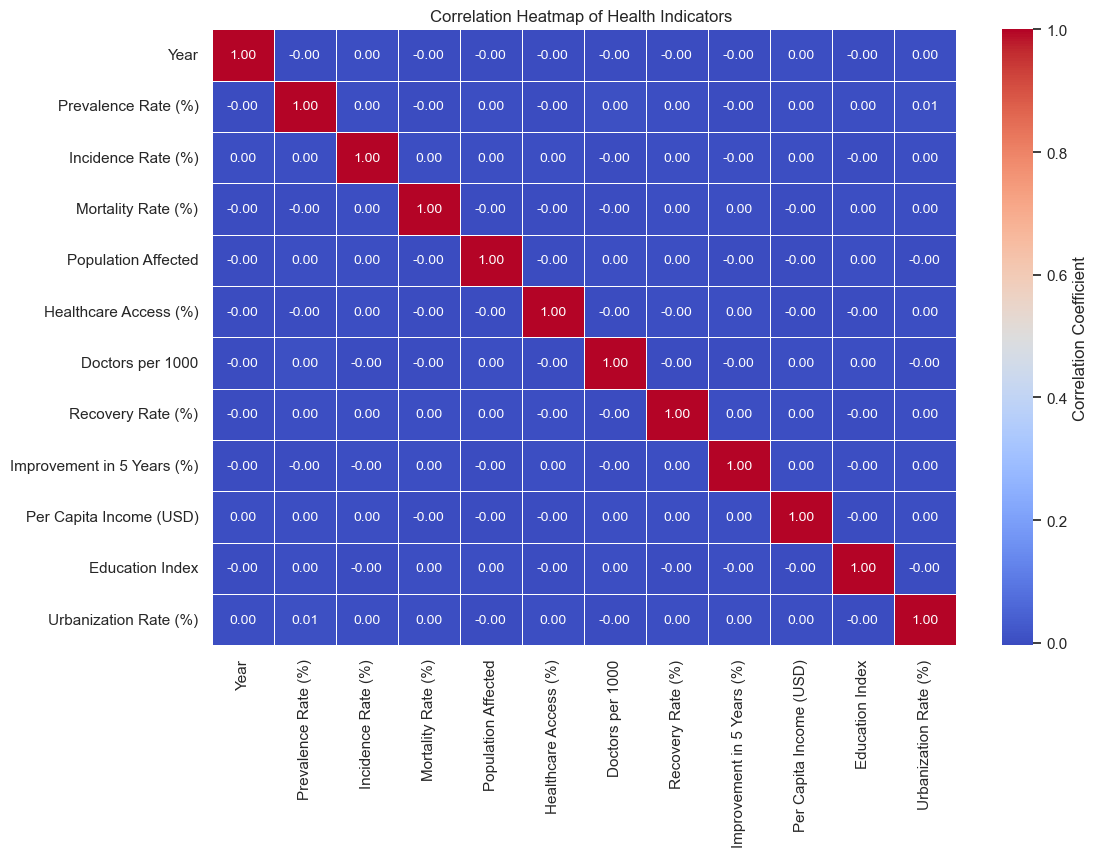

In [43]:
#Create correlation heat map of all relevant data
corr = cleaned[['Year', 'Prevalence Rate (%)', 'Incidence Rate (%)', 'Mortality Rate (%)',
           'Population Affected', 'Healthcare Access (%)', 'Doctors per 1000', 'Recovery Rate (%)', 'Improvement in 5 Years (%)', 
                'Per Capita Income (USD)', 'Education Index', 'Urbanization Rate (%)']].corr()


fig_heatmap, fig_heatmap_ax = plt.subplots(figsize=(12, 8))

sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=0.5,
    annot_kws={'size': 10},
    cbar_kws={'label': 'Correlation Coefficient'},
    ax=fig_heatmap_ax
)

# Add a title to the heatmap
fig_heatmap_ax.set_title('Correlation Heatmap of Health Indicators ')